#### Predicts the price of Google (GOOG) stock for a specific day using machine learning algorithms
#### Used the radial basis function kernel, or RBF in Support Vector Regression (SVR), linear and polynomial regression

In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("fivethirtyeight")

In [2]:
# Load stock data
company = "BTC-USD"
start = dt.date(2022, 3, 1)
end = dt.date.today()

df = web.DataReader(company, "yahoo", start, end)
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-01,44793.601562,42952.585938,43194.503906,44354.636719,32479047645,44354.636719
2022-03-02,45077.578125,43432.851562,44357.617188,43924.117188,29183112630,43924.117188
2022-03-03,44021.578125,41914.750000,43925.195312,42451.789062,24967782593,42451.789062
2022-03-04,42479.613281,38805.847656,42458.140625,39137.605469,28516271427,39137.605469
2022-03-05,39566.335938,38777.035156,39148.449219,39400.585938,16975917450,39400.585938
2022-03-06,39640.175781,38211.648438,39404.199219,38419.984375,19745229902,38419.984375
2022-03-07,39430.226562,37260.203125,38429.304688,38062.039062,28546143503,38062.039062
2022-03-08,39304.441406,37957.386719,38059.902344,38737.269531,25776583476,38737.269531
2022-03-09,42465.671875,38706.093750,38742.816406,41982.925781,32284121034,41982.925781


In [3]:
# Show and store the last row of data
actual_price = df.tail(1)
# Show the data
actual_price


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-30,47544.847656,46759.917969,47375.777344,47317.886719,32138979328,47317.886719


In [4]:
# Get all of the data except the last row
df = df.head(len(df) - 1)
# Show the data set
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-01,44793.601562,42952.585938,43194.503906,44354.636719,32479047645,44354.636719
2022-03-02,45077.578125,43432.851562,44357.617188,43924.117188,29183112630,43924.117188
2022-03-03,44021.578125,41914.750000,43925.195312,42451.789062,24967782593,42451.789062
2022-03-04,42479.613281,38805.847656,42458.140625,39137.605469,28516271427,39137.605469
2022-03-05,39566.335938,38777.035156,39148.449219,39400.585938,16975917450,39400.585938
2022-03-06,39640.175781,38211.648438,39404.199219,38419.984375,19745229902,38419.984375
2022-03-07,39430.226562,37260.203125,38429.304688,38062.039062,28546143503,38062.039062
2022-03-08,39304.441406,37957.386719,38059.902344,38737.269531,25776583476,38737.269531
2022-03-09,42465.671875,38706.093750,38742.816406,41982.925781,32284121034,41982.925781


In [5]:
# Create empty lists
days = list()
close_prices = list()


In [6]:
df.index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [7]:
# Get only the dates and the close prices
df_days = df.index.date
df_close = df.loc[:, 'Close']

In [8]:
# Create the independent data set (dates)
for day in df_days:
    days.append([int(str(day).split('-')[2])])
# Create the dependent data set (close prices)
for close_price in df_close:
    close_prices.append(float(close_price))

In [9]:
# Show the days
days

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29]]

In [10]:
# Show the close prices
close_prices

[44354.63671875,
 43924.1171875,
 42451.7890625,
 39137.60546875,
 39400.5859375,
 38419.984375,
 38062.0390625,
 38737.26953125,
 41982.92578125,
 39437.4609375,
 38794.97265625,
 38904.01171875,
 37849.6640625,
 39666.75390625,
 39338.78515625,
 41143.9296875,
 40951.37890625,
 41801.15625,
 42190.65234375,
 41247.82421875,
 41077.99609375,
 42358.80859375,
 42892.95703125,
 43960.93359375,
 44348.73046875,
 44500.828125,
 46820.4921875,
 47128.00390625,
 47465.73046875]

In [11]:
# Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, close_prices)
# Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, close_prices)
# Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, close_prices)


SVR(C=1000.0, gamma=0.85)

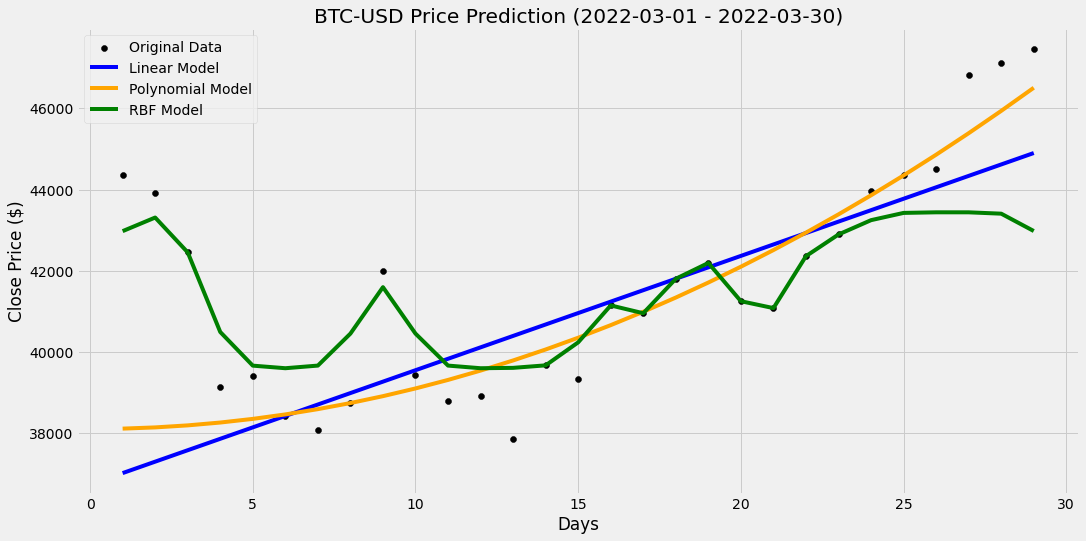

In [12]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, close_prices, color = 'black', label='Original Data')
plt.plot(days, lin_svr.predict(days), color = 'blue', label='Linear Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.title(f'{company} Price Prediction ({start} - {end})')
plt.legend()
plt.show()
# plt.savefig(f"./plot/{company}_SVR_predicted.png")

In [13]:

# Show the predicted price for the given day
day = [[str(end.day)]]
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))
print('The RBF SVR predicted:', rbf_svr.predict(day))

The Linear SVR predicted: [45182.228125]
The Polynomial SVR predicted: [47099.53808725]
The RBF SVR predicted: [41977.94547611]


In [14]:
# Show the actual price
print('The actual price:', actual_price['Close'][str(end)])

The actual price: 47317.88671875


In [15]:
print('The actual price:', actual_price['Close'][f"{end.strftime('%Y-%m-%d')}"])

The actual price: 47317.88671875


In [18]:
actual_price.Close[0]

47317.88671875